In [64]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

In [65]:
dataset = pd.read_csv('fakeBills.csv', sep=';')
dataset_cleaned = dataset.dropna()

In [66]:
X = dataset_cleaned.iloc[:, 1:]
y = dataset_cleaned.iloc[:, 0]

In [67]:
X

,diagonal,height_left,height_right,margin_low,margin_up,length
0,171.81,104.86,104.95,4.52,2.89,112.83
1,171.46,103.36,103.66,3.77,2.99,113.09
2,172.69,104.48,103.50,4.40,2.94,113.16
3,171.36,103.91,103.94,3.62,3.01,113.51
4,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...
1495,171.75,104.38,104.17,4.42,3.09,111.28
1496,172.19,104.63,104.44,5.27,3.37,110.97
1497,171.80,104.01,104.12,5.51,3.36,111.95
1498,172.06,104.28,104.06,5.17,3.46,112.25


In [68]:
y

0        True
1        True
2        True
3        True
4        True
        ...  
1495    False
1496    False
1497    False
1498    False
1499    False
Name: is_genuine, Length: 1463, dtype: bool

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [70]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train)
print(X_test)

[[ 0.81696689  0.81228905  0.27107099 -0.38662937 -1.57238203  1.27270131]
 [-2.04328633 -0.25335841 -1.95267963  0.61691045 -1.70197006 -0.1188252 ]
 [-0.72822738  0.14625939  0.48726896  0.87539798  1.58092672 -1.06970165]
 ...
 [ 1.14573162 -0.18675545  0.33284184  0.17596113 -0.06052167 -1.75386885]
 [-0.43233912 -0.75288066  0.91966492  0.26719203 -1.70197006  0.65811043]
 [ 0.84984336 -0.22005693  0.14752929  0.69293619 -0.70846182  0.37980513]]
[[-0.46521559  0.97879646  0.39461269  2.39591286 -0.53567778 -1.16247008]
 [ 0.4224492   0.07965642  1.04320662 -0.58429631 -0.88124586  1.15674076]
 [ 0.19231389 -0.05354951 -1.08788772  0.02390965 -1.65877405  0.04351956]
 ...
 [ 0.75121394  0.01305345  1.01232119 -0.47786026 -1.48599     0.29863275]
 [-0.8268568   1.54492168 -1.180544   -1.08606622  0.1986544   0.86683941]
 [-0.46521559 -1.78522664 -1.39674197  0.46485896 -0.1901097   0.8436473 ]]


In [71]:
y_train = y_train.values.reshape(-1)
y_test = y_test.values.reshape(-1)

In [72]:
class LogisticRegression:
    def __init__(self, learning_rate=0.001, n_iters=10000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        
    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))


    def feed_forward(self,X):
        z = np.dot(X, self.weights) + self.bias
        A = self._sigmoid(z)
        return A

    def fit(self, X, y):
        n_samples, n_features = X.shape

        self.weights = np.zeros(n_features)
        self.bias = 0

        # gradient descent
        for _ in range(self.n_iters):
            A = self.feed_forward(X)
            dz = A - y
            dw = (1 / n_samples) * np.dot(X.T, dz)
            db = (1 / n_samples) * np.sum(dz)
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
            
    def predict(self, X):
        threshold = .5
        y_hat = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(y_hat)
        y_predicted_cls = [1 if i > threshold else 0 for i in y_predicted]
        
        return np.array(y_predicted_cls)

In [73]:
classifier = LogisticRegression(learning_rate=0.001, n_iters=1000)

startTime = time.time()

classifier.fit(X_train, y_train)

endTime = time.time()

elapsedTime = endTime - startTime
print(f"Gecen sure: {elapsedTime:.6f} saniye")

Gecen sure: 0.077785 saniye


In [74]:
startTime = time.time()

y_pred = classifier.predict(X_test)

endTime = time.time()

elapsedTime = endTime - startTime

print(f"Gecen sure: {elapsedTime:.6f} saniye")
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

Gecen sure: 0.000000 saniye


Accuracy: 0.9754098360655737


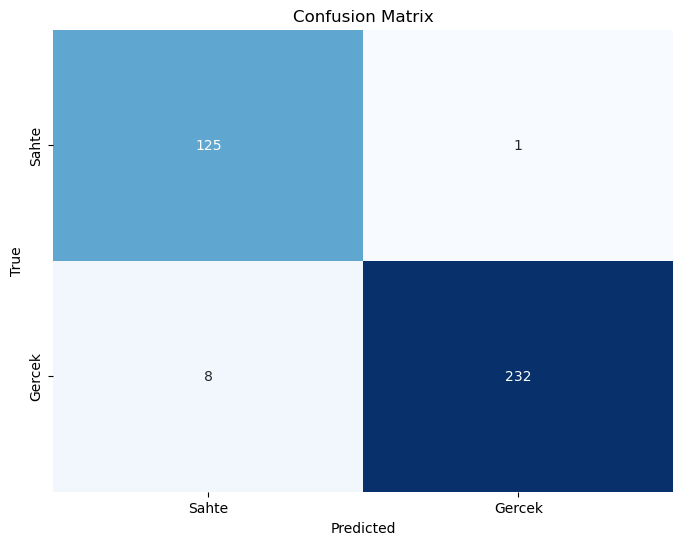

In [75]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Sahte', 'Gercek'], 
            yticklabels=['Sahte', 'Gercek'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [76]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

precision = TP / (TP + FP) if (TP + FP) != 0 else 0
recall = TP / (TP + FN) if (TP + FN) != 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
specificity = TN / (TN + FP) if (TN + FP) != 0 else 0
fpr = FP / (FP + TN) if (FP + TN) != 0 else 0

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"Specificity: {specificity}")
print(f"False Positive Rate: {fpr}")

Precision: 0.9957081545064378
Recall: 0.9666666666666667
F1-Score: 0.9809725158562368
Specificity: 0.9920634920634921
False Positive Rate: 0.007936507936507936
